# Reading nc data and adding different base maps


In [21]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.interpolate import LinearNDInterpolator
from scipy.interpolate import NearestNDInterpolator
from scipy.interpolate import griddata
import rioxarray
import rasterio
import pyproj
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.feature as cfeat
from mpl_toolkits.basemap import Basemap
from matplotlib.animation import FuncAnimation

In [31]:
#read data
drop_variables=['siglay','siglev']
data = '/home/samin/data/112600_0001.nc'
ds = xr.open_dataset(data, decode_times=False,drop_variables=drop_variables)

In [29]:
ds0=ds.isel(siglay=0).isel(time=1)
u = ds0.variables['u']
v = ds0.variables['v']
#time = ds0.variables['time']
lat = ds0.variables['latc'] ##Y
lon = ds0.variables['lonc']  ##X

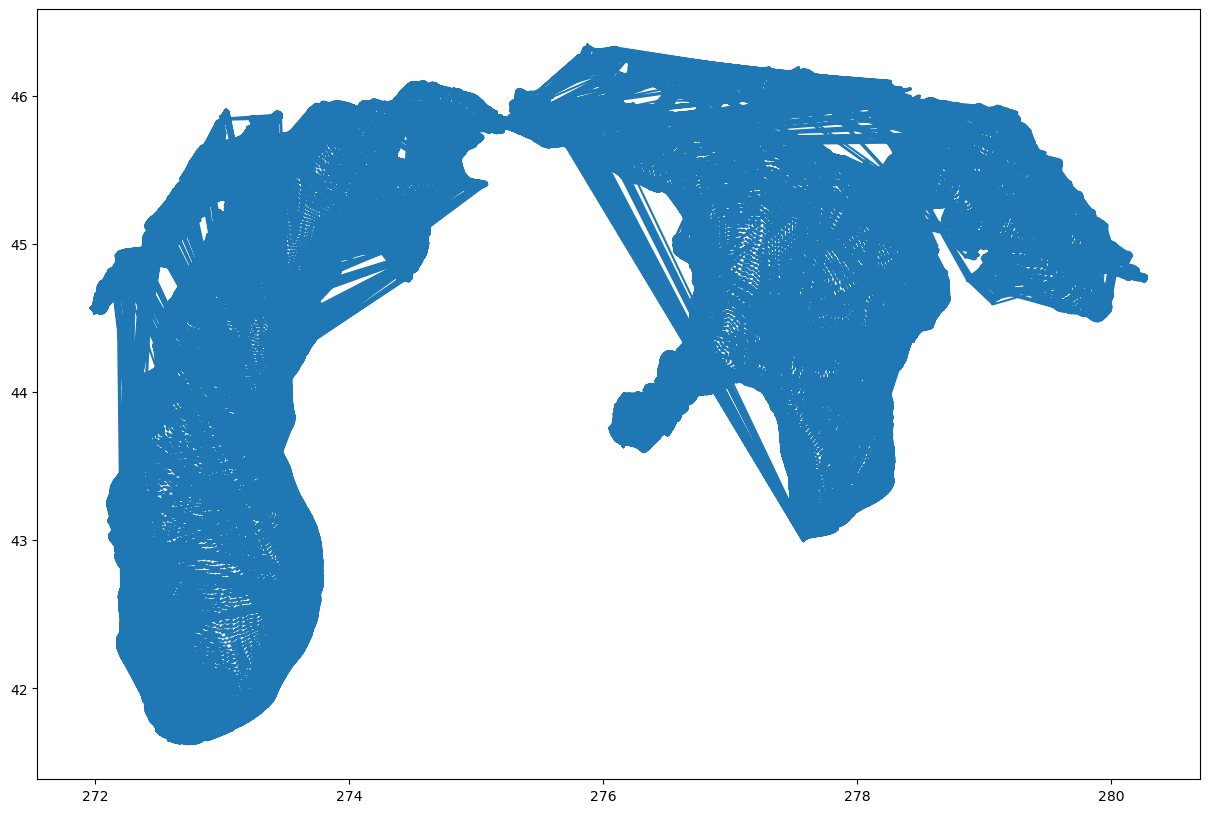

In [39]:
from netCDF4 import Dataset
#nc_fid = Dataset(fpath, 'r')

lats = ds0.variables['latc'][:]  # extract/copy the data
lons = ds0.variables['lonc'][:]
#PM25 = ds0.variables['PM25'][:]

fig, axs = plt.subplots(figsize=(15, 10))
plt.plot(lons,lats)
#cbar=fig.colorbar(pcm,cax=axs[1], extend='both', orientation='horizontal')
#cbar.set_label('PM 2.5 [$\mu$g m$^{-3}]$')

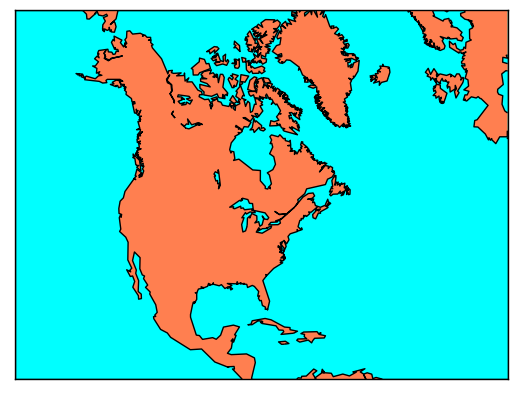

In [48]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=41.,lat_2=46.,lon_0=278.,lat_0=50.0)
# draw coastlines.
m.drawcoastlines()
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='coral',lake_color='aqua')
plt.show()

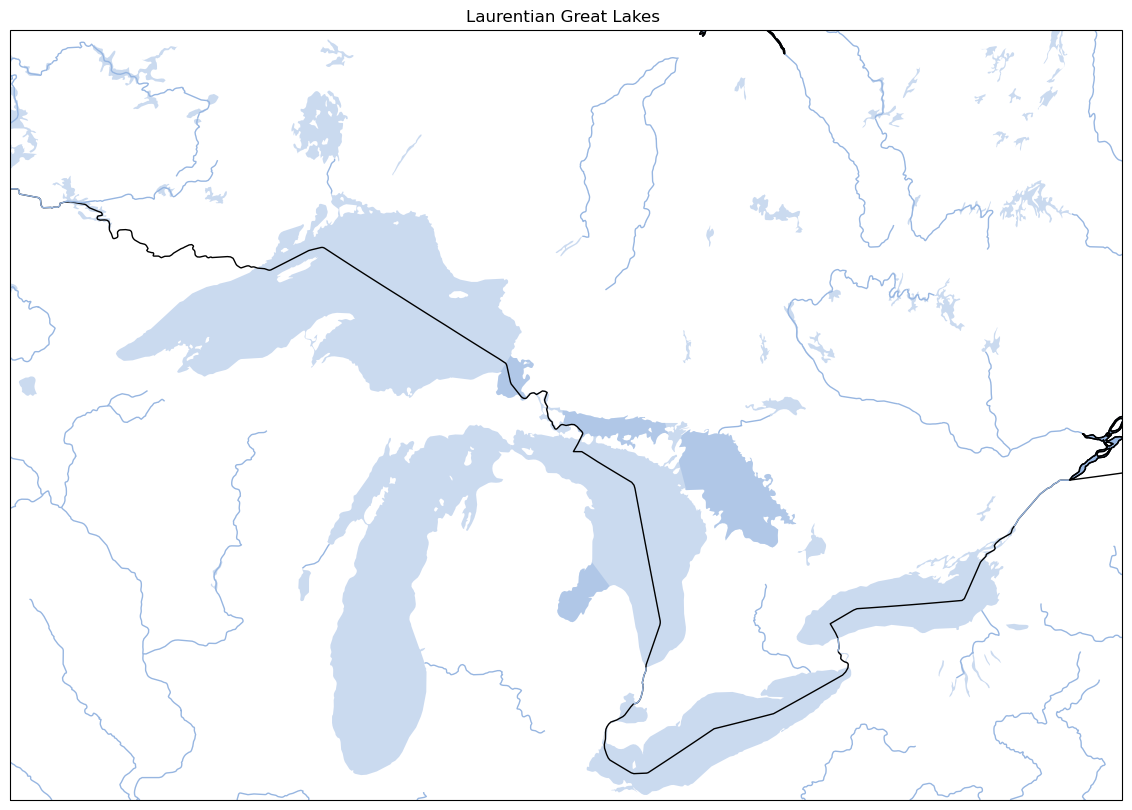

In [78]:
l = plt.figure(figsize=(15,10))
ax = plt.axes(projection=ccrs.epsg(3174))
ax.set_global()
ax.plot(lats,lons,marker='>',markersize='5',color='r')  # didn't use transform, but looks ok...
#ax.gridlines()
ax.add_feature(cfeature.OCEAN,edgecolor='face')
#ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES,alpha=0.5)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS)
ax.coastlines('10m')
ax.set_title('Laurentian Great Lakes ')

#ax.set_xlim((1000000,1001573.847801469)
#ax.set_ylim(1000000,1000648.83302296)
plt.show()
l.savefig("LaurentianGreatLakes.png")

In [76]:
plt.savefig("LaurentianGreatLakes.png")

<Figure size 640x480 with 0 Axes>